# Handling Missing Values.

#### What are the different types of Missing Data?

# 1. Missing Completely at Random(MCAR)
<p>A variable is missing completely at random(MCAR) if the probability of being missing is the same for all the observations.
When data is MCAR, <b>there is absolutely no relationship between the data missing and any other values</b>,observed or missing ,within the dataset.In other words, those missing data points are a random subset od the data. There is nothing systemaic going on that makes some data more likely to be missing than other. <br></p>



In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("D:/Datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## Embarked nan values are MCAR
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 2. Missing Data Not At Random(MNAR): Systematic missing values
<p> <b>There is some relation between the missing data and any other value.</b> </p>

In [7]:
# I will convert nan values to 1 and 0.

df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [8]:
## find the percentage of null values.

df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# 3. Mising At Random(MAR)

Men------ hide their salary

Women------- hide their age

# ALL the techniques of handling missing values.
1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing Nan values with a new feature.
4. End of Distribution impuation.
5. Arbitrary imputation.
6. Frequent Categories imputation.

# Mean/Median/Mode imputation

When Should we apply?<br>
Mean/Median/Mode imputation has the assumpotion that the data are missing completely at random(MCAR).<br>
We solve this by replacing the NAN with the most frequent occurance of the variables.


In [11]:
df = pd.read_csv('D:/Datasets/titanic.csv',usecols=['Age','Fare','Survived'])

In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
## Percentage of missing values.
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
def impute_nan(df,variable):
    df[variable+"_median"] = df[variable].fillna(df[variable].median())

In [21]:
impute_nan(df,'Age')

In [22]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


<AxesSubplot:>

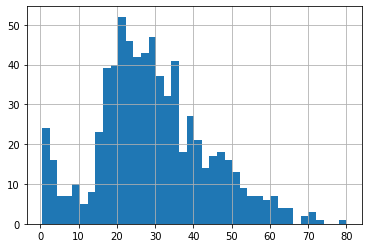

In [23]:
%matplotlib inline
df.Age.hist(bins=40)

In [18]:
df.Age.std()

14.526497332334044

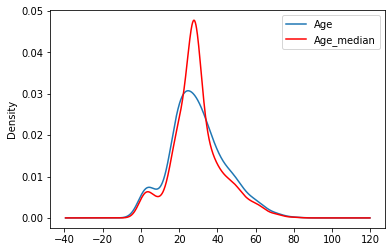

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

# Advantages

1. Easy to implement(Robust to outliers)
2. Faster way t oobtain the complete dataset.

# Disadvantages

1. Change or Distortion in the original variance.
2. Impacts correlation